<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/12 - Redes Neuronales Recurrentes - LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Recurrentes (RNN)


Dentro del Deep Learning existen muchas arquitecturas y cada una de ellas resuelve algún problema en particular. 

Las redes neuronales recurrentes (RNN) son un tipo de red neuronal. Las redes neuronales son una parte importante dentro del Deep Leanring que, a su vez, es un tipo de aprendizaje automático, uno de los campos de estudio de la Inteligencia Artificial. Este tipo de redes neuronales está especializado en el procesamiento de datos secuenciales o series temporales.

¿Qué quiere decir esto? Pues que una RNN puede ayudar en la elaboración de modelos predictivos a partir de una secuencia de datos históricos. Un ejemplo de ello puede ser la elaboración de un modelo predictivo del volumen de ventas de una empresa. Esto podría ayudar a controlar mejor el stock y mejorar los procesos de producción de la compañía.

La arquitectura de las redes neuronales recurrentes facilita que el programa o aplicación desarrollado con ellas pueda recordar y olvidar la información que procesa. De esta manera, este tipo de modelo de machine learning es capaz de recordar datos procesados al principio de la secuenciación para asociarlos con datos nuevos que va analizando.

Esto hace que la s redes neuronales recurrentes también sean especialmente útiles para la creación de texto. Y es que, son capaces de analizar fragmentos de texto y generar nuevos contenidos a partir de ello. Así, una de sus aplicaciones la está encontrando en el desarrollo de aplicaciones de texto predictivo.

Para ver una explicación completa de las redes neuronales LSTM haga click [aqui](https://youtu.be/1BubAvTVBYs)

In [2]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler



from keras.models import Sequential
from keras.layers import Dense, LSTM


In [140]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Levantamos el archivo y dividimos en train y test usando train los datos del 2016 y para test 2017

In [141]:
data = pd.read_csv("https://raw.githubusercontent.com/codificandobits/Prediccion_de_acciones_en_la_bolsa_con_redes_LSTM/master/AAPL_2006-01-01_to_2018-01-01.csv") #[:100]
#data = pd.read_csv("{}/AAPL_2006-01-01_to_2018-01-01.csv".format(contentFolder), index_col='Date', parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [142]:
len(data)

3019

In [143]:
train = data[:"2016"].iloc[:,1:2]
test = data["2017":].iloc[:,1:2]

### Graficamos el valor de la accion en el tiempo 

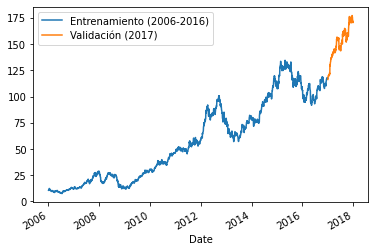

In [144]:
train['High'].plot(legend=True)
test['High'].plot(legend=True)
plt.legend(['Entrenamiento (2006-2016)', 'Validación (2017)'])
plt.show()


### Normalizacion de los datos
Si observamos los datos de la accion podemos ver que la misma posee un comportamiento creciente

In [145]:
# Normalización del set de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

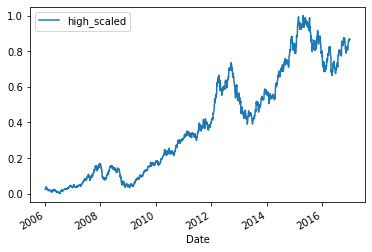

In [146]:
aux = train
aux["high_scaled"] = train_scaled
aux[["high_scaled"]].plot(legend=True)
plt.show()
del aux

#Armamos los datos para entrenar.
Armamos los data sets X_train e y_train.
Para entrenar la Red LSTM en nuestro caso tomaremos bloques de 60 datos consecutivos y la idea es que se pueda predecir el siguiente valor.

Los bloques de 60 datos se almacenan en X_train y el dato a predecir se almacenara en y_train



In [148]:
time_step = 60
indexes = []
X_train = []
y_train = []
m = len(train_scaled)
ventana = 0
for i in range(time_step,m-ventana):
  X_train.append(train_scaled[i-time_step:i,0])
  y_train.append(train_scaled[i+ventana,0])
  indexes.append(train.index[i+ventana])
X_train, Y_train = np.array(X_train), np.array(y_train)
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Creamos el modelo y lo entrenamos
El modelo constara de:
* Capa de entrada con 60 neuronas (ventana de tiempo que usamos para entrenar)
* Una capa LSTM de 50 neuronas
* Una capa de Salida de 1 neurona

In [149]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
85/85 [==============================] - 4s 29ms/step - loss: 0.0126
Epoch 2/20
85/85 [==============================] - 2s 29ms/step - loss: 0.0014
Epoch 3/20
85/85 [==============================] - 3s 31ms/step - loss: 9.5027e-04
Epoch 4/20
85/85 [==============================] - 4s 44ms/step - loss: 8.6255e-04
Epoch 5/20
85/85 [==============================] - 3s 29ms/step - loss: 6.9904e-04
Epoch 6/20
85/85 [==============================] - 2s 29ms/step - loss: 7.1597e-04
Epoch 7/20
85/85 [==============================] - 2s 29ms/step - loss: 6.7102e-04
Epoch 8/20
85/85 [==============================] - 2s 28ms/step - loss: 5.8794e-04
Epoch 9/20
85/85 [==============================] - 2s 29ms/step - loss: 5.9767e-04
Epoch 10/20
85/85 [==============================] - 2s 29ms/step - loss: 5.4720e-04
Epoch 11/20
85/85 [==============================] - 2s 28ms/step - loss: 5.5762e-04
Epoch 12/20
85/85 [==============================] - 2s 28ms/step - loss: 5.2899e-

# Predecimos y graficamos

In [150]:
def graficar_predicciones(real, prediccion, indices):
    plt.plot(pd.DataFrame(real, index= indices),color='red', label='Valor real de la acción')
    plt.plot(pd.DataFrame(prediccion, index = indices), color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.xticks(rotation=45)
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

In [151]:
X_test = []
y_test = []
indexes = []
test_scaled = sc.transform(test)
m = len(test)
ventana = 0
X_test = []
for i in range(time_step,m-ventana):

  X_test.append(test_scaled[i-time_step:i,0])
  y_test.append(test_scaled[i+ventana,0])
  indexes.append(test.index[i+ventana])
X_test, Y_test = np.array(X_test), np.array(y_test)

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
Y_test = sc.inverse_transform(Y_test.reshape(-1,1))


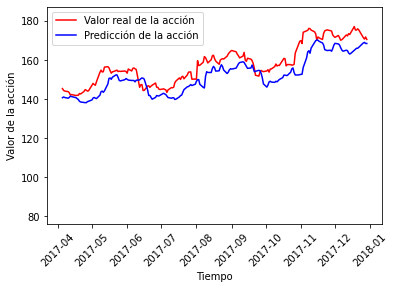

In [152]:
graficar_predicciones(Y_test, prediccion, indexes)

In [155]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, prediccion)


49.93575373554265